**UPDATE 8/12/2019:** Mathworks removed the original post this blog was meant to address around the time I completed writing it.  However, there may be other useful tips contained in the notebook, so I am posting it anyway.  The hyperlink to the original post below has been replaced on the Mathworks website with links to Python/Matlab interoperability features.

---

I was recently made aware of a [post on the Mathworks website](https://www.mathworks.com/products/matlab/matlab-vs-python.html#comparison_table) where they compare MATLAB and Python in an attempt to make the case that MATLAB is a superior language for engineering and scientific computation.  

MATLAB is a useful and powerful computing language and a lot more. It is distributed and used typically through a very polished integrated development environment (IDE) and has many add-on toolboxes for a vast array of scientific computing tasks.  While a few of the claims in the post are true, the vast majority of them are seriously misleading.

I'll attempt to counter many of those claims in this post.

The first claim is that MATLAB code is more readable to scientists and engineers than Python code that performs a similar task.  They use the following code examples to illustrate their point and even go as far to claim that their is a mistake in the Python operations.

<img src="https://www.mathworks.com/content/mathworks/www/en/products/matlab/matlab-vs-python/jcr:content/mainParsys/columns/2/columns_399888801/2/image.adapt.full.high.jpg/1552392139565.jpg" width=500>

They make the claim that the Python/NumPy solution doesn't have the correct dimensions to support the outer product operation.  This is because NumPy was created for element-wise array operations first and foremost.  It should be noted that this is a much cleaner syntax for the type of array computing that is typically done in data science, but nevertheless, thier example can easily be corrected by simply adding a second set of brackets to explicitly add the second dimension to the row vector.  Initially it will have a shape (1, 3) instead of (3,).  This can be seen by looking at the array's shape attribute.

In [1]:
import numpy as np
np.array([1, 2, 3]).shape

(3,)

In [2]:
np.array([[1, 2, 3]]).shape

(1, 3)

The correct code is now (excluding the `import numpy as np` statement because it is already loaded above)

In [3]:
row = np.array([[1, 2, 3]])

col = row.T

inner = np.dot(row, col)
inner

array([[14]])

In [4]:
outer = np.dot(col, row)
outer

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

Another complaint is that the `np.dot` operation is a function call instead of a built-in operator.  They must not be aware of the `@` operator in , e.g.

In [5]:
row @ col

array([[14]])

In [6]:
col @ row 

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

Now you might say that the `@` operator is not how we would typically write matrix/tensor mathematics in handwriting or in typesetting a book or paper.  That is true, but that is the same for the `*` operator.  If you want to be extremely verbose, you could use Einstien indicial notation, i.e.

\begin{align}
\vec{a} \cdot \vec{b} = \sum_i a_i b_i = a_i b_i, \quad &\mbox{(inner product)} \\
\vec{a} \otimes \vec{b} =  a_i b_j, \quad &\mbox{(outer product)}
\end{align}

where the convention is that the summation over any repeated index implies summation and the $\sum$ notation can be dropped.  This can be implemented in via NumPy as

In [7]:
row = np.array([1, 2, 3])

inner = np.einsum('i,i', row, row)
inner

14

for the inner product and

In [8]:
outer = np.einsum('i,j', row, row)
outer

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

for the outer product.  Of course, these require function calls to `np.einsum`, but the indicial notation syntax follows the written tensorial mathematics notation in a natural way.

Adding the additional dimension can be done through indexing as well if the initial array doesn't include enough dimensions, e.g.

In [9]:
row[:, None] @ row[None, :]

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

As mentioned above, NumPy was designed for element-wise array computations, and this syntax is much cleaner, e.g.

In [10]:
a = np.arange(10); a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
b = np.arange(10, dtype=np.double); b

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [12]:
c = a * b
c

array([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])

An equivalent expression in MATLAB requires the use of a period (.) in front of the multiplication operator. 

```matlab
c = a .* b
```

This syntax can become unsightly in long expressions.

---

Let's examine a few more claims:

> **Engineers and scientists deserve tools that fit the way they work. They shouldn’t have to adapt the way they work to fit their tools.**
>
> Python functions are typically designed and documented by advanced programmers for other experienced programmers.

The definition of an *advanced programmer* is imprecise and subjective.  Do they mean to imply that MATLAB **is not** designed and documented by advanced programmers?  The reality is that many of the Python packages for scientific computing, e.g. [NumPy](https://numpy.org/) and [SciPy](https://www.scipy.org/) were developed by engineers.  The initial core developer of both of those packages was [Travis Oliphant](https://en.wikipedia.org/wiki/Travis_Oliphant), an electrical engineer by training, while he was a graduate student and later as a professor of electrical engineering.  While we don't know who exactly is writing Matlab code, the scientific Python packages are developed in the open, on [Github](https://github.com/), where you can view the profiles of the individual contributors.  [Take a look for yourself](https://github.com/numpy/numpy/graphs/contributors), in addition to Oliphant, the second largest contributor is [Charles Harris](http://www.blog.pythonlibrary.org/2017/12/04/pydev-of-the-week-charles-r-harris/) a physics major and mathematician (the mother and father disciplines of engineering...), the third largest contributer is [David Cournapeau](https://en.wikipedia.org/wiki/David_Cournapeau) an electrical engineer and data scientist, etc.

>Python development environments for scientific computing lack the reliability and integration of the MATLAB desktop.

Ever heard of [Spyder IDE](https://www.spyder-ide.org/)?

<img src="files/spyder.png" width=700>

Looks a lot like MATLAB...

>Everything about MATLAB is designed specifically for engineers and scientists:
>
>  * Function names and signatures are familiar and memorable, making them as easy to write as they are to read.

The same is true of NumPy and SciPy, many of the names are identical to thier MATLAB equivalents.
  
>New function interfaces undergo a rigorous design process that typically involves dozens to hundreds of developer-hours per function.

So you say... Can I see your test suite?  Logs from the latest continuous integration run?  Code coverage?  I can for [NumPy](https://travis-ci.org/numpy/numpy/builds) all 10,000+ tests, [on multiple platforms](https://dev.azure.com/numpy/numpy/_build?definitionId=5) (Windows, MacOS, Linux) and the [code coverage](https://codecov.io/gh/numpy/numpy).  Same goes for [SciPy](https://github.com/scipy/scipy) and most of the rest of the scientific Python suite.

## Exploration and iteration

They claim:


>The desktop environment is tuned for iterative engineering and scientific workflows.

There are many options in the Python world that offer the same, [Spyder](https://www.spyder-ide.org/) as already mentioned, the [PyCharm IDE](https://www.jetbrains.com/pycharm/), and of course the venerable [Project Jupyter](https://jupyter.org/) with [JupyterLab](https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/try.jupyter.org?urlpath=lab) and [Jupyter Notebooks](https://mybinder.org/v2/gh/ipython/ipython-in-depth/master?filepath=binder/Index.ipynb).


> Integrated tools support simultaneous exploration of data and programs, letting you explore more ideas in less time.

Again [Spyder](https://www.spyder-ide.org/), [PyCharm](https://www.jetbrains.com/pycharm/), and  [JupyterLab](https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/try.jupyter.org?urlpath=lab) offer many of the same features built in and additionally the growing world of extensions to Jupyter Notebooks and JupyterLab, e.g. [a visual debugger](https://github.com/jupyterlab/debugger).  Not to mention the ease of creating interactive dashboards in Jupyter Notebooks, i.e.

In [36]:
from ipywidgets import interact
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 2*np.pi, num=100)

@interact
def sine_plot(a=(0,10,1)):
    plt.plot(x, a * np.sin(x))
    plt.ylim([-10, 10])

interactive(children=(IntSlider(value=5, description='a', max=10), Output()), _dom_classes=('widget-interact',…

## Documentation

>Documentation is written for engineers and scientists, not computer scientists.

Let's compare the documentation from two similar functions.  First from NumPy:

In [14]:
from IPython.display import IFrame    
IFrame('https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html', width=800, height=400)

Now from MATLAB

In [15]:
IFrame('https://www.mathworks.com/help/matlab/ref/linspace.html', width=800, height=400)

It's impossible to understand the argument here.  Both functions documentation are equally clear in explaination.  And the same is true for all of the functions in NumPy and SciPy.


## Machine learning

---

Next they quote a customer:

>"As a process engineer I had no experience with neural networks or machine learning. I worked through the MATLAB examples to find the best machine learning functions for our predictive metrology use case. I couldn’t have done this in C or Python—it would’ve taken too long to find, validate, and integrate the right packages."
>
>-Emil Schmitt-Weaver, ASML

I can't argue with the statement in respect to the C programming language.  But, in the Python ecosystem we have [Scikit-Learn](https://scikit-learn.org/stable/) which is quite possibly the world's most used machine learning framework. The [documentation](https://scikit-learn.org/stable/documentation.html) is extremely extensive with many examples and [tutorials](https://scikit-learn.org/stable/tutorial/index.html).  Included is this extremely helpful flowchart for assistance in choosing a machine learning model to apply

<img src="https://scikit-learn.org/stable/_static/ml_map.png" width=700>

when viewed from the [original documentation website](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) the different estimators include hyperlinks to the documentation for each method.

Scikit-learn, NumPy, SciPy, Spyder IDE, Jupyter Notebooks and 100s more useful packages and tools are all included in the free [Anaconda Python Distribution](https://www.anaconda.com/distribution/).  It can be installed on all major computer operating systems (Windows, Linux, MacOS) with a [one-click download](https://www.anaconda.com/distribution/#download-section) and downloads and installs in far less time than even the base distribution of MATLAB.  It includes a convenient application launcher for the different IDEs/Jupyter Notebooks/JupyterLab, etc.  It couldn't be easier to get started with the Python scientific computing stack than it is to use the Anaconda Distribution.

---


## Apps and dashboards

Next, they introduce [MATLAB Apps](https://www.mathworks.com/discovery/matlab-apps.html) and claim that "Python doesn't offer integrated workflow apps for scientific and engineering applications".  Well, that is true in the sense that they are not integrated into any type of distribution.  Many of the MATLAB Apps they cite are not part of the standard MATLAB distribution either, they are offered as separate products for purchase.  This is true of the [Curve Fitting Toolbox](https://www.mathworks.com/products/curvefitting.html) for example.  

However, as Python has a much larger overall user base, there are many examples of complicated applications built using open source tools freely available, e.g. [New York City Taxi Explorer](https://nyc-taxi.pyviz.demo.anaconda.com/dashboard).  In fact, we can build a simple user interface for curve-fitting in just a few lines of Python.

Column
    [0] Column(margin=5, name='Param00007', width=300)
        [0] StaticText(value='<b></b>')
        [1] Select(name='Choose a file', options=OrderedDict([('anscombe.cs...]), value='./anscombe.csv')
        [2] Checkbox(name='Fit Curve')
    [1] ParamMethod(method)
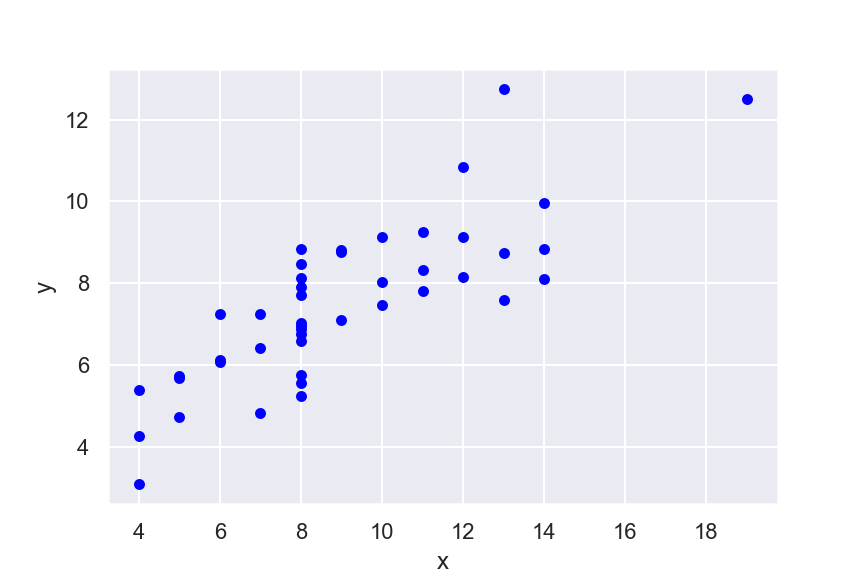

In [16]:
import param
import panel as pn
import pandas as pd
from scipy import stats
pn.extension()

class CurveFit(param.Parameterized):

    dataset = param.FileSelector(path='./*.csv*', label="Choose a file")
    
    fit_curve = param.Boolean(False, label="Fit Curve")
    
    @param.depends('dataset','fit_curve', watch=True)
    def view(self):
        
        data = pd.read_csv(self.dataset)

        fig, ax = plt.subplots()
        
        if self.fit_curve:
            slope, intercept, _, _, _ = stats.linregress(data['x'], data['y'])

            ax = sns.regplot(x="x", y="y", data=data, color='blue', 
                        line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

            ax.legend()
        else:
            data.plot.scatter(x="x", y="y", c="blue", ax=ax)
            
            
        plt.close(fig)
        return fig
        
curve_fit = CurveFit(name="")
pn.Column(curve_fit.param, curve_fit.view)

Of course this could be made far more feature rich, but the basic idea is demonstrated with a minimal amount of code.

---

Next claim:

>MATLAB helps automate the entire path – from research to production.

This is just a sales pitch for another separate product to purchase.  This time for [MATLAB Production Server](https://www.mathworks.com/campaigns/offers/deploying-matlab-with-production-it-systems-using-matlab-production-server.html).  With claims about deployment of MATLAB applications to IoT devices, cloud, GPUs, etc.  As Python is installed by default or easily added to virtually every Linux server in the world, Python applications can be easily deployed, for free, to all of these places as well.


---

## On performance


They display this figure

<img src="https://www.mathworks.com/products/matlab/matlab-vs-python/_jcr_content/mainParsys/columns/2/columns_297234033/2/image_658928665.adapt.full.high.jpg/1552392139998.jpg" width=400>


but provide no supporting source code for the comparisons.  Of course, if they are comparing vectorized and/or compiled MATLAB code to pure Python `for`-loops, MATLAB will always be faster.  Let's do a few of our own comparisons...

Lets add 1 to a million numbers.  We'll define a function in pure Python syntax (no NumPy):

In [17]:
def add_one(array):
    array_plus_one = []
    for i in array:
        array_plus_one += [i + 1]
    return array_plus_one

x = range(1000000)

We can use the IPython magic command `%timeit` to time the execution of this function and report some statistics.

In [18]:
%timeit add_one(x);

The slowest run took 4.51 times longer than the fastest. This could mean that an intermediate result is being cached.
249 ms ± 154 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Of course, in the code above, the array `array_plus_one` is reconstructed every time through the `for`-loop.  We can get a little more performance and a cleaner syntax by using a Python [List Comprehension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python).

In [19]:
def add_one_comprehension(array):
    array_plus_one = [i + 1 for i in array]
    return array_plus_one

Again using the `%timeit` module we can see that the list comprehension approach is somewhat faster.

In [20]:
%timeit add_one_comprehension(x)

98.6 ms ± 8.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


One of the claims in the article is that all MATLAB code is [just-in-time (JIT) compiled](https://www.mathworks.com/products/matlab/matlab-execution-engine.html).  Python has a just-in-time compiler as well available through the [Numba](https://numba.pydata.org/) package.  All we have to do is import and add a one line function decorator to the code above to use it.

In [21]:
from numba import jit

@jit(nopython=True)
def add_one_numba(array):
    array_plus_one = [i + 1 for i in array]
    return array_plus_one

x = np.arange(1000000, dtype=np.double)

Here we see an additional performance gain with very little effort by using the JIT compilation.  I call the function once to allow the JIT compilation to occur before executing the timing operation.

In [22]:
_ = add_one_numba(x)
%timeit add_one_numba(x)

53.4 ms ± 2.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Finally we move to the easiest solution.  Using NumPy arrays and broadcasting the addition.

In [23]:
def add_one_numpy(array):
    return array + 1

And we see an improvement of about 2 orders of magnitude.

In [24]:
%timeit add_one_numpy(x)

642 µs ± 87.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Finally, we can squeak out a little more performance by adding JIT compilation (with parallel execution) to the NumPy function.  Like last time, we'll call the function to allow JIT compilation before executing the timing operation.

In [25]:
@jit(nopython=True, parallel=True)
def add_one_numpy_numba_parallel(array):
    return array + 1

In [26]:
_ = add_one_numpy_numba_parallel(x)
%timeit add_one_numpy_numba_parallel(x)

619 µs ± 51.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Appears to be only a tiny bit faster, but not meaningfully so, perhaps if the vector `x` were much larger we could see the true benefit of parallel execution.

Now we'll write similar code in MATLAB, writing a function file

In [27]:
%%file add_one.m
function array_plus_one = add_one(array)

for i = 1:length(array)
    array_plus_one(i) = array(i) + 1;
end
end

Overwriting add_one.m


and running the code from the command line.  Here, notice I allocate the argument `x` first and make a function call to `add_one` **before** a second call to `add_one()` surrounding by the timing marks `tic` and `toc`.  This is to allow any JIT compilation to occur before attempting the timing.  We don't get the statics that `%timeit` gives us, but we do see that this implementation is faster than the pure Python approach, but slower than the Numba JIT code from Python and much slower than the NumPy code.

In [28]:
!/Applications/MATLAB_R2019a.app/bin/matlab -batch "x=0:999999;add_one(x);tic;add_one(x);toc;"

Elapsed time is 0.092315 seconds.


Even though the code above was written to be as close to the pure Python approach above, most folks know that preallocating your arrays in MATLAB can speed up the code.  So let's do that.

In [29]:
%%file add_one_preallocate.m
function array_plus_one = add_one(array)

array_plus_one = zeros(size(array));

for i = 1:length(array)
    array_plus_one(i) = array(i) + 1;
end
end

Overwriting add_one_preallocate.m


A little improvement here, but still not anywhere near the speed of the NumPy code.

In [30]:
!/Applications/MATLAB_R2019a.app/bin/matlab -batch "x=0:999999;add_one(x);tic;add_one_preallocate(x);toc;"

Elapsed time is 0.069837 seconds.


Finally, let's try the vectorized approach in MATLAB.  

In [31]:
%%file add_one_vectorize.m
function array_plus_one = add_one(array)

array_plus_one = array + 1;

Overwriting add_one_vectorize.m


This is by far the fastest approach in MATLAB; however, it's still slower than the NumPy code above.

In [32]:
!/Applications/MATLAB_R2019a.app/bin/matlab -batch "x=0:999999;add_one_vectorize(x);tic;add_one_vectorize(x);toc;"

Elapsed time is 0.005523 seconds.


Now I'm not making the claim that Python/NumPy code will always be faster that MATLAB.  But it wasn't too difficult to find some (very) simple examples where that is the clearly not the case.  If they are going to make bold claims like the ones shown in the figure above, they should publish the source codes of each implementation to ensure that the codes are written in a respectively equal way.  There are lots of small optimizations that can be made in either language to speed up code run times.

---

## Other comments

They go on with many more claims and report the purported downfalls of Python, such as the fact that Python is a general purpose computing language and not a math- and matrix-oriented language.  This is in fact an asset, not a hindrance of Python.  The general purpose nature means there are far more users overall, which translates into more help for beginners getting started.  Python is the [5th highest tag](https://stackoverflow.com/tags) on [Stack Overflow](https://stackoverflow.com/), a question and answer website for programmers.  Matlab does not appear as a tag on the at least first page of 32 different tags.

They complain that the visualization tools in the Python ecosystem are fragmented.  Well yes, there are several different useful libraries for visualization.  However, [Matplotlib](https://matplotlib.org/) is the default choice and mimics most or all of the capabilities of MATLAB as it was heavily inspired by it. In fact, I'll make the claim that any 2D visualization you've ever seen can be reproduced with Matplotlib.  See the extensive [examples gallery](https://matplotlib.org/gallery/index.html) for further evidence of this claim.  There are other great plotting libraries, like [Bokeh](https://bokeh.pydata.org/en/latest/) who's focus is on generating interactive figures rendered with JavaScript and intended for display on web pages.  These can include plots that can have callbacks into the Python language for interactive updating via complex computation and/or realtime streaming data..  These types of interactive visualizations can be deployed to webpages, for free.  Any interactivity available via MATLAB visualizations requires a licensed version of MATLAB running to serve the visualization.  These cannot be deployed, certainly not for free, to the everyone via a standard web server.  Matplotlib and Bokeh can be selectively used as a backend in a unified plotting library called [Holoviews](http://holoviews.org/).  Holoviews allows you to create beautiful visualizations with few commands that can be rendered with either Bokeh (for figures intended for web pages) or Matplotlib (for figures intended for print publications) with ease.  If you prefer the [Grammer of Graphics](https://www.springer.com/in/book/9780387245447) approach to visualization there are other great packages like [Altair](https://altair-viz.github.io/) and [ggplot](http://ggplot.yhathq.com/).  Again, the diversity of choices is an asset, not a hindrance to the Python ecosystem.

They claim that "[MATLAB Coder](https://www.mathworks.com/campaigns/offers/matlab-convert-to-c-trial-request.html) generates readable, portable C and C++ code".  Another sells pitch for a product offered outside of the base MATLAB distribution.  Because of the open-source and portable nature of Python and the Python scientific packages, there often no reason to do such a thing.  The entire package framework can often be moved to production with the need to change anything and certainly without the licensing issues one would face running MATLAB.  A more frequent use case is to use Python to "glue" together C/C++/Fortran function calls from libraries.  We've already demonstrated how we can get near C-code speed with Numba, and that's often more than adequate.  There are other packages like [CFFI](https://cffi.readthedocs.io/en/latest/) that allow you to write and compile C-code that can easily be called from Python.  This includes code that calls functions from other libraries such as [OpenMP](https://www.openmp.org/) for thread parallelism.  Below is a simple example, the key part here is the C-code contained in the `ffibulder.set_source()` argument.  It uses OpenMP to make the `for`-loop thread parallel.

In [33]:
%%file omp_add_one_builder.py
import os
from cffi import FFI
ffibuilder = FFI()

ffibuilder.set_source("omp_add_one",
   r"""
   #include "omp.h"

   void add_one(const int n, const double *x, double *result){
   
   int i;
   #pragma omp parallel for private(i)
   for (i = 0; i < n; i++){
        result[i] = x[i] + 1;
        }
   }
   """, 
   library_dirs=[os.environ['CONDA_PREFIX'] + '/lib'],
   include_dirs=[os.environ['CONDA_PREFIX'] + '/include'],
   libraries=['omp'])

ffibuilder.cdef("""
    void add_one(const int n, const double *x, double *result);
""")

if __name__ == "__main__":
    ffibuilder.compile(verbose=False)

Overwriting omp_add_one_builder.py


Now we can compile the code into a dynamic library and CFFI automatically generates the Python interface wrapper.

In [34]:
%run omp_add_one_builder.py

<Figure size 432x288 with 0 Axes>

Here is short script that calls the function.  Mimicking the behavior of the `add_one` functions above.

In [35]:
from omp_add_one import ffi
from omp_add_one import lib as omp

N = 1000000

x = np.arange(N, dtype=np.double)
result = np.empty_like(x)

x_ = ffi.cast("const double*", ffi.from_buffer(x))
result_ = ffi.cast("double *", ffi.from_buffer(result))

%timeit omp.add_one(N, x_, result_)

631 µs ± 96.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Of course, this is faster than all but the `add_one_numba_parallel()` function above (they are essentially the same speed) because they effectively both have equivalent object code.

Finally, most of the rest of the arguments in their post make statements related to a lack of integrated features  in Python. I assume they are talking about the core Python language and this is very misleading in the context of Scientific computing because no one work works in this space attempts to do so with pure Python, everyone uses the libraries discussed in this post and commonly, folks are simply installing the Anaconda Distribution in which all of these packages *are integrated* into one maintained system with compatible libraries, visualization tools, sand-boxed environments for exploration and prototyping, a choice of IDEs, and many more features.

This post can be acessed in it's original for as a Jupyter notebook [here](https://github.com/johntfoster/MatlabVsPython/blob/master/MatlabVsPython.ipynb).  Of course, you will need a running installation of MATLAB and possibly have to change the file paths to the executable to get this those code cells with the MATLAB timings to work properly.